<a href="https://colab.research.google.com/github/JuuhhCarol/AulasIA/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [21]:
from google.colab import files
uploaded = files.upload()

Saving credit_data.csv to credit_data (1).csv


In [22]:
base_credit = pd.read_csv('credit_data.csv')
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


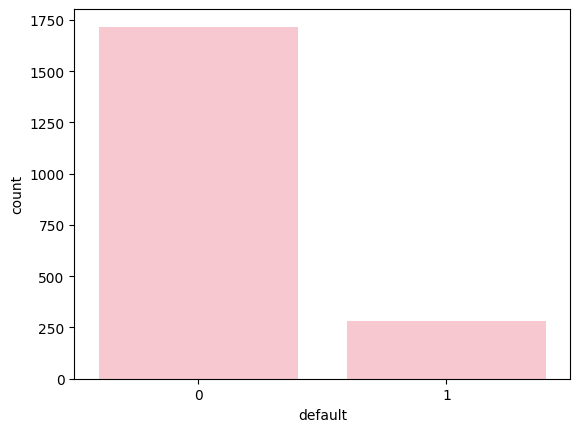

In [23]:
sns.countplot(x = base_credit['default'], color = 'pink');

In [24]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [25]:
base_credit['age']=base_credit['age'].fillna(base_credit['age'].mean())

In [26]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,0
loan,0
default,0


In [27]:
x_credit = base_credit.iloc[:,1:4].values
y_credit = base_credit.iloc[:,4].values


In [28]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit=scaler_credit.fit_transform(x_credit)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size= 0.25, random_state= 0 )

In [32]:
from sklearn.svm import SVC
#poly,
svm_credit = SVC(kernel='linear', C=1.0)
svm_credit.fit(x_credit_treinamento, y_credit_treinamento)

SVC(kernel='linear')

In [33]:
previsoes = svm_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.95

0.95

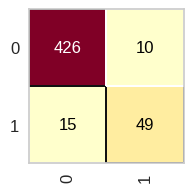

In [35]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm= ConfusionMatrix(svm_credit)
cm.fit(x_credit_treinamento,y_credit_treinamento)
cm.score(x_credit_teste,y_credit_teste)